# Imports

In [1]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from hetanalysis import HetAnalysis
import plotter
from clean import PCBCCleaner, DrawPointCoordCleaner

output_dir = "../outputs/het_analysis_pcbc/"
SAVE = True

%matplotlib widget

# Data Input

In [2]:
df = PCBCCleaner.get_processed_data()
dp_coords = DrawPointCoordCleaner.get_processed_data()

In [6]:
df

,dhid,date,weight,CU,AU
0,P08-04W,2021_2,1.000000,0.445853,0.473962
1,P08-04W,2021_4,7.185358,0.445853,0.473962
2,P08-04W,2021_6,90.465466,0.445853,0.473962
3,P08-04W,2021_8,24.556073,0.445853,0.473962
4,P08-04W,2022_1,2247.061308,0.529466,0.554649
...,...,...,...,...,...
13209,P26-12E,2022_9,638.270199,0.632717,0.543535
13210,P26-12E,2022_10,1362.954562,0.711671,0.608383
13211,P26-13E,2022_9,1.000000,0.277313,0.319020
13212,P26-13E,2022_10,1878.426579,0.369132,0.375707


# Visualize

In [3]:
dpids = list(df['dhid'].unique())

sets = {
    'no_draw': set(),
    'draw': set()
}

for id in list(dp_coords.index):
    if id in dpids:
        sets['draw'].add(id)
    else:
        sets['no_draw'].add(id)

In [4]:
def get_total_draw(dpid):
    filtered_df = df.query('dhid == @dpid')
    return filtered_df['weight'].sum()

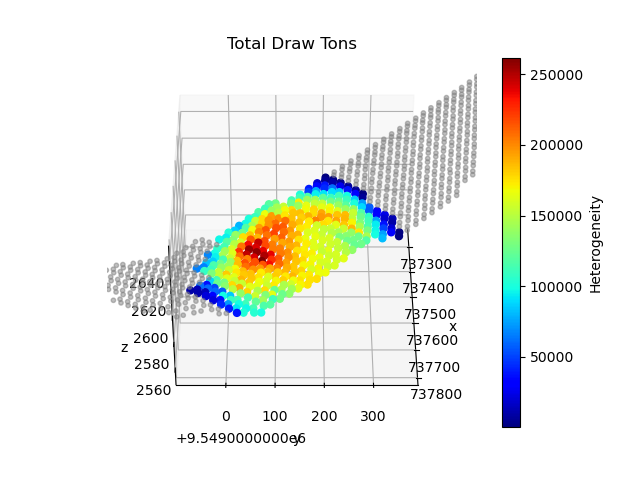

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

no_draw = sets['no_draw']
draw = sets['draw']

cmap = plt.colormaps.get('jet')

p = ax.scatter3D(
    [dp_coords.loc[dpid]['x'] for dpid in draw], 
    [dp_coords.loc[dpid]['y'] for dpid in draw],
    [dp_coords.loc[dpid]['z'] for dpid in draw], 
    c=[get_total_draw(dpid) for dpid in draw],
    cmap=cmap,
    s=25,
    alpha=1
)

# Set limits to the non-nan values
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.set_zlim([2550, 2650])

ax.scatter3D(
    [dp_coords.loc[dpid]['x'] for dpid in no_draw], 
    [dp_coords.loc[dpid]['y'] for dpid in no_draw],
    [dp_coords.loc[dpid]['z'] for dpid in no_draw], 
    s=10,
    alpha=0.5,
    c='grey'
)

ax.set_title(f'Total Draw Tons')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.azim = 0
ax.elev = 40

cbar = fig.colorbar(p)
cbar.set_label('Heterogeneity')

In [ ]:
def animate_draw_data(i, dfs, xlim, ylim):
    ax.clear()
    
    # given an i (elapsed months), get the draw data from that month from the dictionary
    for df in dfs:
        points = get_points(i, df)

        # Plot that data on a 2D graph
        ax.plot(
            points
        )
    
    # Set the x and y axis to display a fixed range
    # We only care about the first 610 or so drawpoints because none of the later ones have draw data
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Set a title for the given month and year
    year, month = get_year_month(i)
    ax.set_title(f'{month + 1}, {year}')

In [ ]:
# Save the animation
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 8)

ani = FuncAnimation(
    fig, 
    animate_draw_data, 
    fargs=[[draw_tons_data], [0, 610], [0, 20000]],
    frames=len(draw_tons_data),
    interval=500, 
    repeat=False
)
# plt.close()

# Save the animation as an animated GIF
ani.save(
    GIF_SAVE_LOC + "draw_tons.gif", 
    dpi=300,
    writer=PillowWriter(fps=2)
)